**линейный классификатор**

правило Розенблатта  

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from time import time

def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [3]:
n_samples = 500
n_clst = 2 # количество кластеров

X,y = make_blobs( 
        n_samples=n_samples,
        centers=n_clst,  
        random_state=get_seed(),
        cluster_std=[1.0, 2.5,]
    )

In [4]:
X.shape, y.shape

((500, 2), (500,))

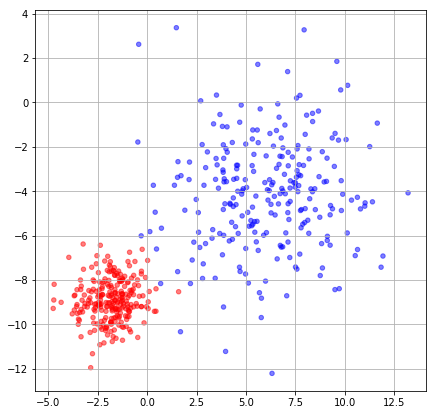

In [5]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [6]:
# биннаризация X

In [7]:
n=50
b = np.vstack([ np.linspace(X[:,j].min()-1,X[:,j].max()+1,n) for j in range(X.shape[1]) ])

In [8]:
# b

In [9]:
Xp = np.hstack([
    np.hstack([ ( (b[j,i]<X[:,j])&(X[:,j]<b[j,i+1]) ).astype(int).reshape(X.shape[0],1) 
    for i in range(b.shape[1]-1) ])
    for j in range(X.shape[1])
])

Xp.shape

(500, 98)

In [10]:
# Xp

---

In [11]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=Xp.shape[1])
W 

array([-0.05642994, -0.07993013, -0.00989307,  0.01082798,  0.02174801,
        0.24575826,  0.01080833,  0.03434584,  0.08734943,  0.14456141,
        0.07817844,  0.23944157,  0.07149584, -0.01366202,  0.0345461 ,
        0.04215921, -0.19695626, -0.04658651, -0.03296641, -0.0929175 ,
        0.03809567, -0.03491596, -0.0500284 ,  0.01360051, -0.07875778,
        0.08095909, -0.08972257, -0.01870433, -0.07376293, -0.04493742,
        0.15771466,  0.04866099, -0.14267486,  0.05560733, -0.23546195,
        0.05017502,  0.0084741 ,  0.16294356,  0.00189302,  0.05246377,
       -0.03331308, -0.0275553 ,  0.00140408, -0.10388775, -0.06226333,
       -0.11954758,  0.05470994,  0.06665883,  0.05039056,  0.01044396,
       -0.07176467,  0.00064561, -0.06263728,  0.08523908, -0.04108338,
        0.10346337, -0.00869691, -0.01249435, -0.03527696,  0.06207798,
       -0.07076521,  0.11819199, -0.02379839,  0.08145315,  0.08633897,
       -0.12155521, -0.13431513, -0.03598809, -0.09164852, -0.06

In [12]:
def loss(x,w,y): return -x.dot(w)*y    

In [13]:
MAX_ITER = 20 # максимальное число циклов обучения

# ERROR_BOUND = -Xp.shape[0]*0.99 # порог ошибки (количество ошибок)
ERROR_BOUND = -3.1

a=0.7 # скорость обучения
l = 0.5 # темп "забывания"

er_hist = [] # история ошибки

In [14]:
q = loss(Xp,W,y).sum()
er_hist.append( q )

In [15]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):
    if stop: break
    for j in np.random.permutation(Xp.shape[0]):
        
        if er_hist[-1] < ERROR_BOUND: # проверяем достижение порога
            print( 'error bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break

        xj,yj = Xp[j,:],y[j]
        
        r = (xj.dot(W)>0.5).astype(int) # выход
        W = W - a * xj.T.dot(r-y[j])
        
        # значение ф-ции потери
        qj = loss(xj,W,yj)
        q = l*qj +(1-l)*q
        er_hist.append( q )  
        

In [16]:
print(W)
print(len(er_hist),er_hist[-1],min(er_hist))

[-0.05642994 -0.07993013 -0.00989307  0.01082798 -0.67825199 -0.45424174
  0.01080833 -0.66565416 -0.61265057 -0.55543859 -0.62182156 -0.46055843
  0.07149584 -0.71366202  0.0345461   0.74215921 -0.19695626  0.65341349
  0.66703359  0.6070825   0.73809567  0.66508404  0.6499716   1.41360051
  0.62124222  0.78095909  0.61027743  0.68129567  0.62623707  0.65506258
  0.85771466  0.74866099  1.25732514  0.75560733  0.46453805  0.75017502
  0.7084741   1.56294356  0.70189302  0.05246377  0.66668692 -0.0275553
  0.70140408  1.29611225 -0.06226333 -0.11954758  0.05470994  0.06665883
  0.05039056  0.01044396 -0.07176467  0.70064561 -0.06263728  0.08523908
 -0.04108338  0.10346337 -0.00869691 -0.01249435 -0.03527696 -0.63792202
 -0.07076521  0.11819199 -0.72379839  0.08145315  0.08633897 -0.12155521
  0.56568487 -0.03598809 -0.09164852  1.33403684  0.52648135  0.6153934
  0.77447116  0.63920676  0.7627476   0.74755368  0.70267979  0.7368407
  0.61444066  0.70473487  1.65399588  0.7212622   0.65

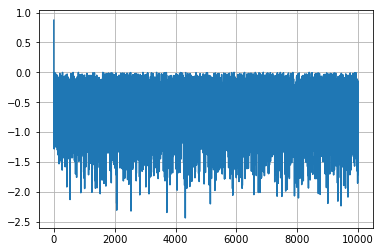

In [17]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [18]:
o = Xp.dot(W)

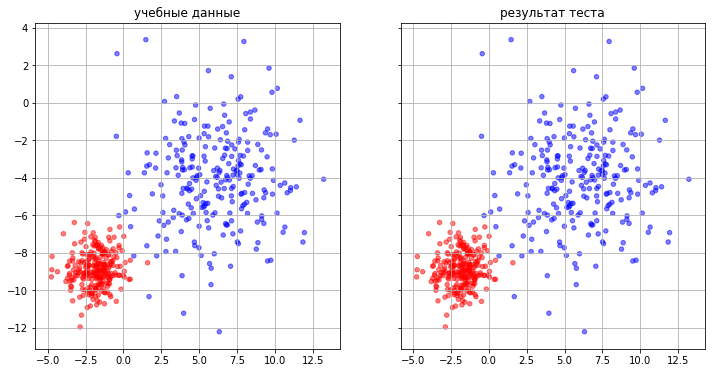

In [19]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат теста')
axarr[1].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0.5) else 'r' for j in o ], 
             s=20,
             alpha=0.5 )
axarr[1].grid()

plt.show()
